# SelectFromModel

Using our scaler data and our data (adding lda) to quickly check the model that fits the best 

## Imports

### Import libraries

In [30]:
import pandas as pd
import numpy as np

### Import data

In [31]:
churn_norm = pd.read_csv("Churn_Norm-Copy1.csv")

In [32]:
churn_norm.head()

,Unnamed: 0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0
1,1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0
2,2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0
3,3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0
4,4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0


In [33]:
# remove "Unnamed: 0"
churn_norm.drop(columns="Unnamed: 0", inplace=True)

# place target column a the end of the dataset
churn_norm= churn_norm[["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Gender_Int","Geography_Germany","Geography_Spain","Balance_Int","Exited"]]


In [34]:
# check dataset
churn_norm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int,Exited
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,0.0,1.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,1.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,1.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,1.0,0.0,1.0,1.0,0.0


## Models Visuals

Automatically created module for IPython interactive environment


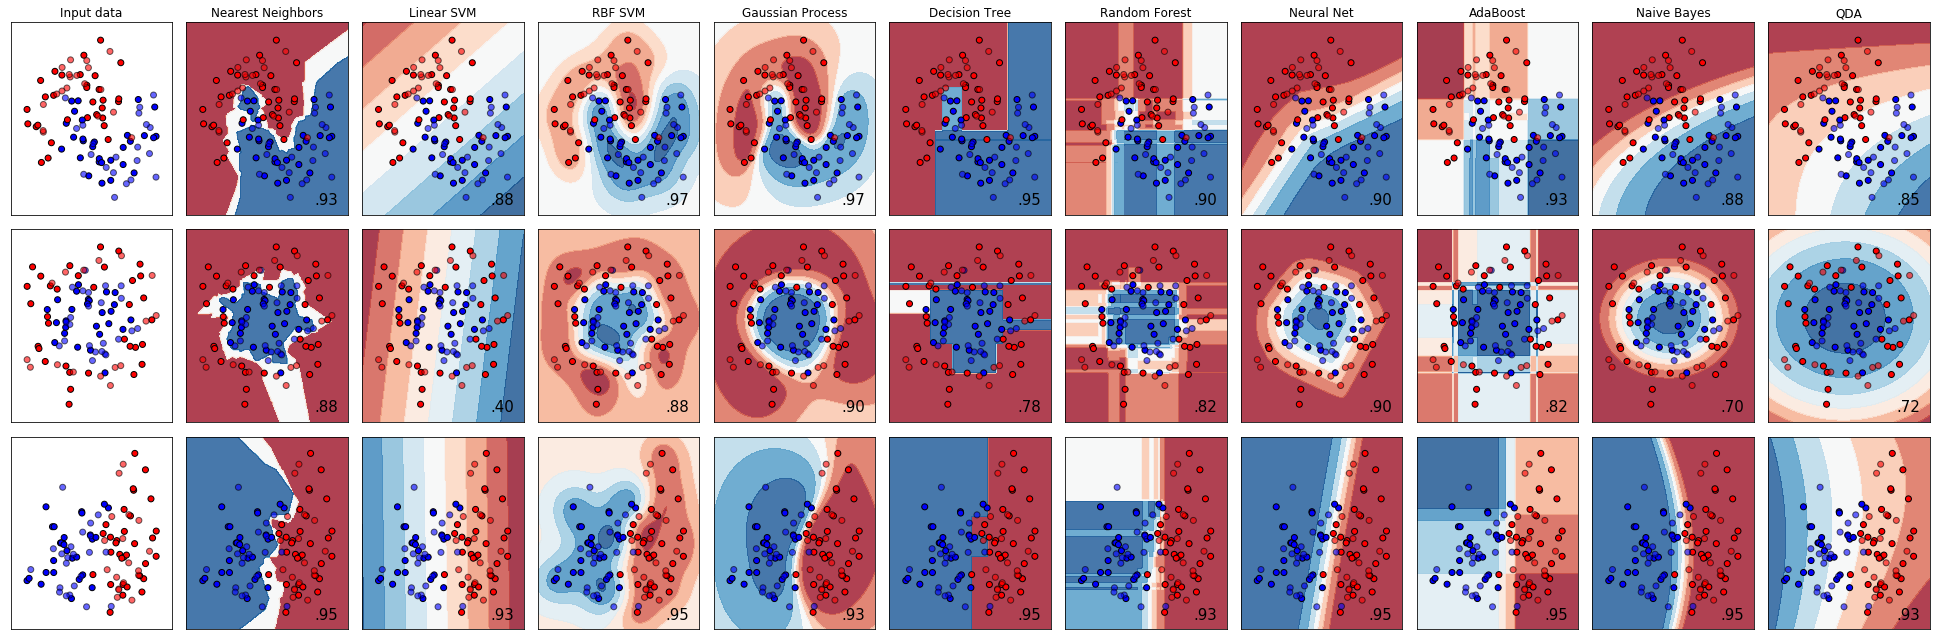

In [41]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Models Data

In [73]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [71]:
# Define X (selects every row and every column except the last column)
X = churn_norm.iloc[:,:-1].values

# Define target/labels  
y = churn_norm['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [75]:
# Models

# LRC
LR_model = LogisticRegression()

# SVC
SVC_model = svm.SVC()

# KNN 
# n_neighbors= number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

# DTC
DTC_model = DecisionTreeClassifier()

# KNC
KNC_model = KNeighborsClassifier()

# LDA
LDA_model = LinearDiscriminantAnalysis()

# GNB
GNB_model = GaussianNB()

# RFC 
RFC_model= RandomForestClassifier()

# Redes Neuronales
MLPC_model = MLPClassifier()




# Fit 
LR_model.fit(X_train, y_train)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
DTC_model.fit(X_train, y_train)
KNC_model.fit(X_train, y_train)
LDA_model.fit(X_train, y_train)
GNB_model.fit(X_train, y_train)
RFC_model.fit(X_train, y_train)
MLPC_model.fit(X_train, y_train)



# Predict
LR_pred = LR_model.predict(X_test)
SVC_pred = SVC_model.predict(X_test)
KNN_pred = KNN_model.predict(X_test)
DTC_pred = DTC_model.predict(X_test)
KNC_pred = KNC_model.predict(X_test)
LDA_pred = LDA_model.predict(X_test)
GNB_pred = GNB_model.predict(X_test)
RFC_pred = RFC_model.predict(X_test)
MLPC_pred = MLPC_model.predict(X_test)





# Evaluate 
# Confusion Matrix and Classification Report 
print("Confusion_matrix_LR \n", confusion_matrix(LR_pred, y_test))
print("classification_report_LR \n", classification_report(LR_pred, y_test))

print("Confusion_matrix_SVC \n", confusion_matrix(SVC_pred, y_test))
print("classification_report_SVC \n", classification_report(SVC_pred, y_test))

print("Confusion_matrix_KNN \n", confusion_matrix(KNN_pred, y_test))
print("classification_report_KNN \n", classification_report(KNN_pred, y_test))

print("Confusion_matrix_DTC \n", confusion_matrix(DTC_pred, y_test))
print("classification_report_DTC \n", classification_report(DTC_pred, y_test))

print("Confusion_matrix_KNC \n", confusion_matrix(KNC_pred, y_test))
print("classification_report_KNC \n", classification_report(KNC_pred, y_test))

print("Confusion_matrix_LDA \n", confusion_matrix(LDA_pred, y_test))
print("classification_report_LDA \n", classification_report(LDA_pred, y_test))

print("Confusion_matrix_GNB \n", confusion_matrix(GNB_pred, y_test))
print("classification_report_GNB \n", classification_report(GNB_pred, y_test))

print("Confusion_matrix_RFC \n", confusion_matrix(RFC_pred, y_test))
print("classification_report_RFC \n", classification_report(RFC_pred, y_test))

print("Confusion_matrix_MLPC \n", confusion_matrix(MLPC_pred, y_test))
print("classification_report_MLPC \n", classification_report(MLPC_pred, y_test))

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion_matrix_LR 
 [[789 147]
 [ 26  38]]
classification_report_LR 
               precision    recall  f1-score   support

         0.0       0.97      0.84      0.90       936
         1.0       0.21      0.59      0.31        64

    accuracy                           0.83      1000
   macro avg       0.59      0.72      0.60      1000
weighted avg       0.92      0.83      0.86      1000

Confusion_matrix_SVC 
 [[803 122]
 [ 12  63]]
classification_report_SVC 
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.92       925
         1.0       0.34      0.84      0.48        75

    accuracy                           0.87      1000
   macro avg       0.66      0.85      0.70      1000
weighted avg       0.94      0.87      0.89      1000

Confusion_matrix_KNN 
 [[774 111]
 [ 41  74]]
classification_report_KNN 
               precision    recall  f1-score   support

         0.0       0.95      0.87      0.91       885
         1.0     

In [ ]:
# añadir comentarios 
